In [1]:
import os
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns

from grr.pltools import hide_border

In [2]:
plt.style.use(os.path.join('..', '..', 'figs', 'scripts', 'writeup', 'publication_figure_style.dms'))
plt.rc('text', usetex = False)
IMG_PATH = os.path.join('..', '..', 'figs', 'ims', 'GIF_individuals')

In [3]:
MODEL_PATH = os.path.join('..', '..', 'data', 'models')

In [4]:
models = {}
for celltype in ['GABA', '5HT', 'mPFC']:
    models[celltype] = {}
    for modtype in ['GIFs', 'AugmentedGIFs']:
        with open(os.path.join(MODEL_PATH, celltype, '_'.join([celltype, modtype]) + '.lmod'), 'rb') as f:
            models[celltype][modtype] = pickle.load(f)

In [5]:
mod_params = {
    'celltype': [],
    'modtype': [],
    'gl': [],
    'El': [],
    'C': [],
    'Vt_star': [],
    'gbar_K1': [],
    'h_tau': [],
    'gbar_K2': []
    
}

for celltype in models:
    for modtype in models[celltype]:
        for i in range(len(models[celltype][modtype])):
            mod_params['celltype'].append(celltype)
            mod_params['modtype'].append(modtype)
            for param in mod_params:
                if param in ['celltype', 'modtype']:
                    # Not really a param.
                    continue
                else:
                    mod_params[param].append(getattr(models[celltype][modtype][i], param, np.nan))

mod_params = pd.DataFrame(mod_params)
mod_params.head()

,C,El,Vt_star,celltype,gbar_K1,gbar_K2,gl,h_tau,modtype
0,0.099397,-64.450986,-56.354892,5HT,NaN,NaN,0.001101,NaN,GIFs
1,0.121656,-80.399273,-54.312115,5HT,NaN,NaN,0.001341,NaN,GIFs
2,0.115281,-64.852600,-49.114775,5HT,NaN,NaN,0.002272,NaN,GIFs
3,0.093887,-63.563634,-46.170493,5HT,NaN,NaN,0.001654,NaN,GIFs
4,0.106077,-54.182140,-59.582678,5HT,NaN,NaN,0.001899,NaN,GIFs


In [6]:
filters = {
    'celltype': [],
    'modtype': [],
    'eta': [],
    'eta_support': [],
    'gamma': [],
    'gamma_support': []
    
}

for celltype in models:
    for modtype in models[celltype]:
        for i in range(len(models[celltype][modtype])):
            filters['celltype'].append(celltype)
            filters['modtype'].append(modtype)
            for filtertype in filters:
                if filtertype in ['celltype', 'modtype'] or 'support' in filtertype:
                    # Not really a param.
                    continue
                else:
                    support, filt_tmp = getattr(models[celltype][modtype][i], filtertype).getInterpolatedFilter(0.1)
                    filters[filtertype].append(filt_tmp)
                    filters[filtertype + '_support'].append(support)

filters = pd.DataFrame(filters)
filters.head()

,celltype,eta,eta_support,gamma,gamma_support,modtype
0,5HT,"[0.09215607487051711, 0.09022332882068111, 0.0...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[-1.2868398595387633, -1.2552518170714295, -1....","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...",GIFs
1,5HT,"[0.14131025516905554, 0.13846427817585247, 0.1...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[101.40312375393252, 101.18651580559272, 100.9...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...",GIFs
2,5HT,"[0.08461724669438983, 0.08478698174437609, 0.0...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[101.93300241805153, 101.62477397414625, 101.3...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...",GIFs
3,5HT,"[0.055501370322552285, 0.05580911408970252, 0....","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[192.81592192490743, 192.19418782949464, 191.5...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...",GIFs
4,5HT,"[-0.0018463711244877763, -2.6540428193892046e-...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[6.762666709493914, 6.747148714353493, 6.73168...","[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...",GIFs


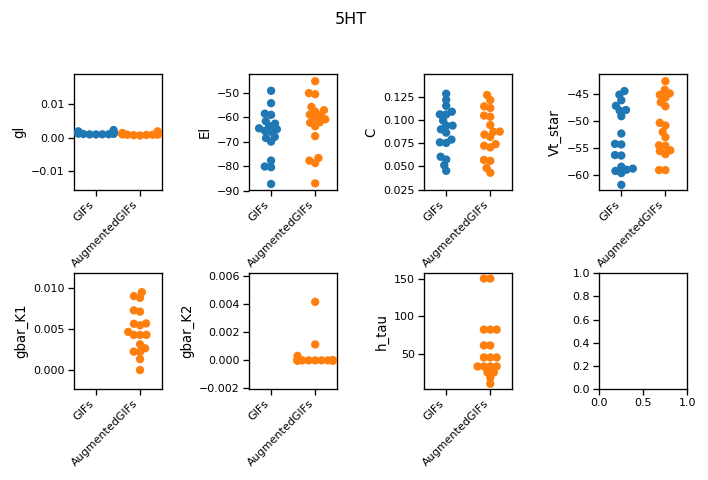

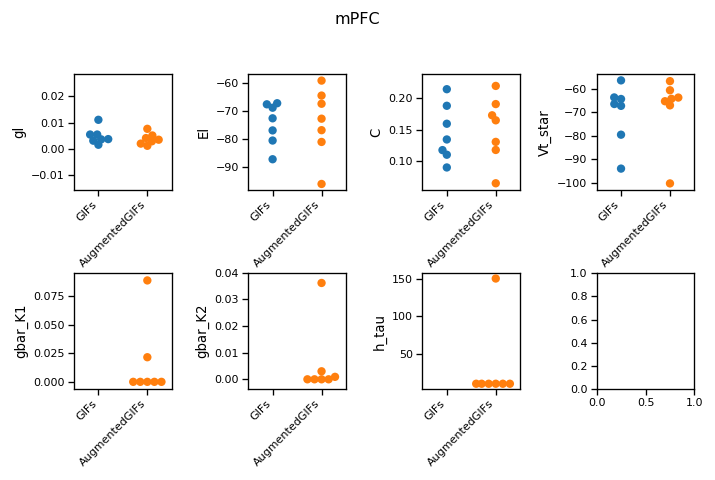

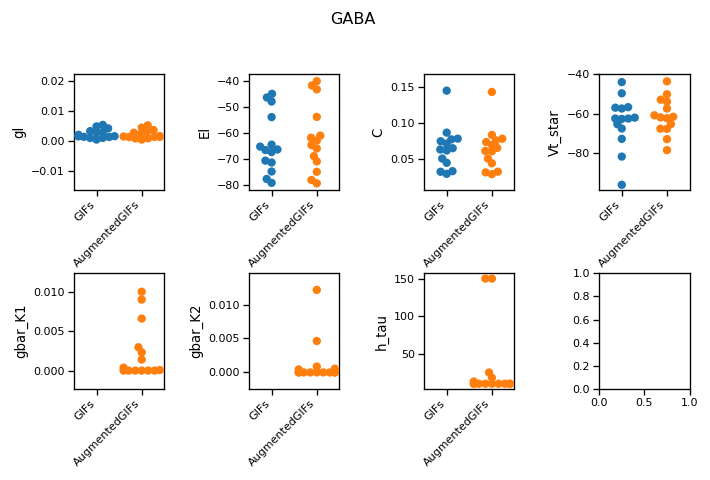

In [7]:
for celltype in filters['celltype'].unique():

    fig, axes = plt.subplots(2, 4, figsize=(6, 4))
    plt.suptitle(celltype)
    
    axes = axes.flatten()
    
    for i, param in enumerate(['gl', 'El', 'C', 'Vt_star', 'gbar_K1', 'gbar_K2', 'h_tau']):
        chart = sns.swarmplot(
            x='modtype', 
            y=param, 
            data=mod_params.loc[mod_params['celltype'] == celltype, :],
            ax=axes[i]
        )
        axes[i].set_xticklabels(chart.get_xticklabels(), rotation=45, ha='right')
        axes[i].set_xlabel('')

    plt.tight_layout()
    plt.subplots_adjust(top=0.85)
    
    if IMG_PATH is not None:
        plt.savefig(os.path.join(IMG_PATH, 'parameters_{}.png'.format(celltype)))

    plt.show()

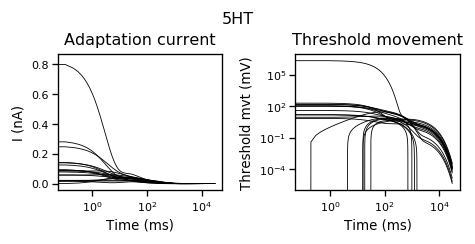

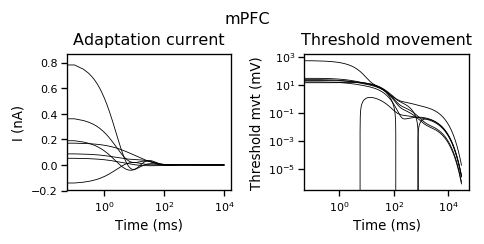

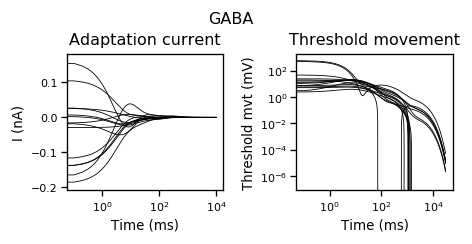

In [8]:
for celltype in filters['celltype'].unique():

    plt.figure(figsize=(4, 2))
    
    plt.suptitle(celltype)

    plt.subplot(121)
    plt.title('Adaptation current')
    plt.semilogx(
        np.array(filters.loc[(filters['celltype'] == celltype) & (filters['modtype'] == 'GIFs'), 'eta_support'].tolist()).T,
        np.array(filters.loc[(filters['celltype'] == celltype) & (filters['modtype'] == 'GIFs'), 'eta'].tolist()).T,
        'k-'
    )
    #plt.ylim(1e-5, 1.1)
    plt.ylabel('I (nA)')
    plt.xlabel('Time (ms)')

    plt.subplot(122)
    plt.title('Threshold movement')
    plt.loglog(
        np.array(filters.loc[(filters['celltype'] == celltype) & (filters['modtype'] == 'GIFs'), 'gamma_support'].tolist()).T,
        np.array(filters.loc[(filters['celltype'] == celltype) & (filters['modtype'] == 'GIFs'), 'gamma'].tolist()).T,
        'k-'
    )
    plt.ylabel('Threshold mvt (mV)')
    plt.xlabel('Time (ms)')

    plt.tight_layout()
    plt.subplots_adjust(top=0.80)
    
    if IMG_PATH is not None:
        plt.savefig(os.path.join(IMG_PATH, 'spike_triggered_filters_{}.png'.format(celltype)))

    plt.show()